In [1]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, MDS, Isomap
from random import randint
from time import time
import numpy as np
import pandas as pd
import MNIST

In [2]:
x_train = MNIST.x_train
y_train = MNIST.y_train
x_test = MNIST.x_test
y_test = MNIST.y_test

In [3]:
mnist_df = pd.DataFrame(data=np.c_[x_train])
mnist_df.insert(0, "Label", y_train)
mnist_df

,Label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


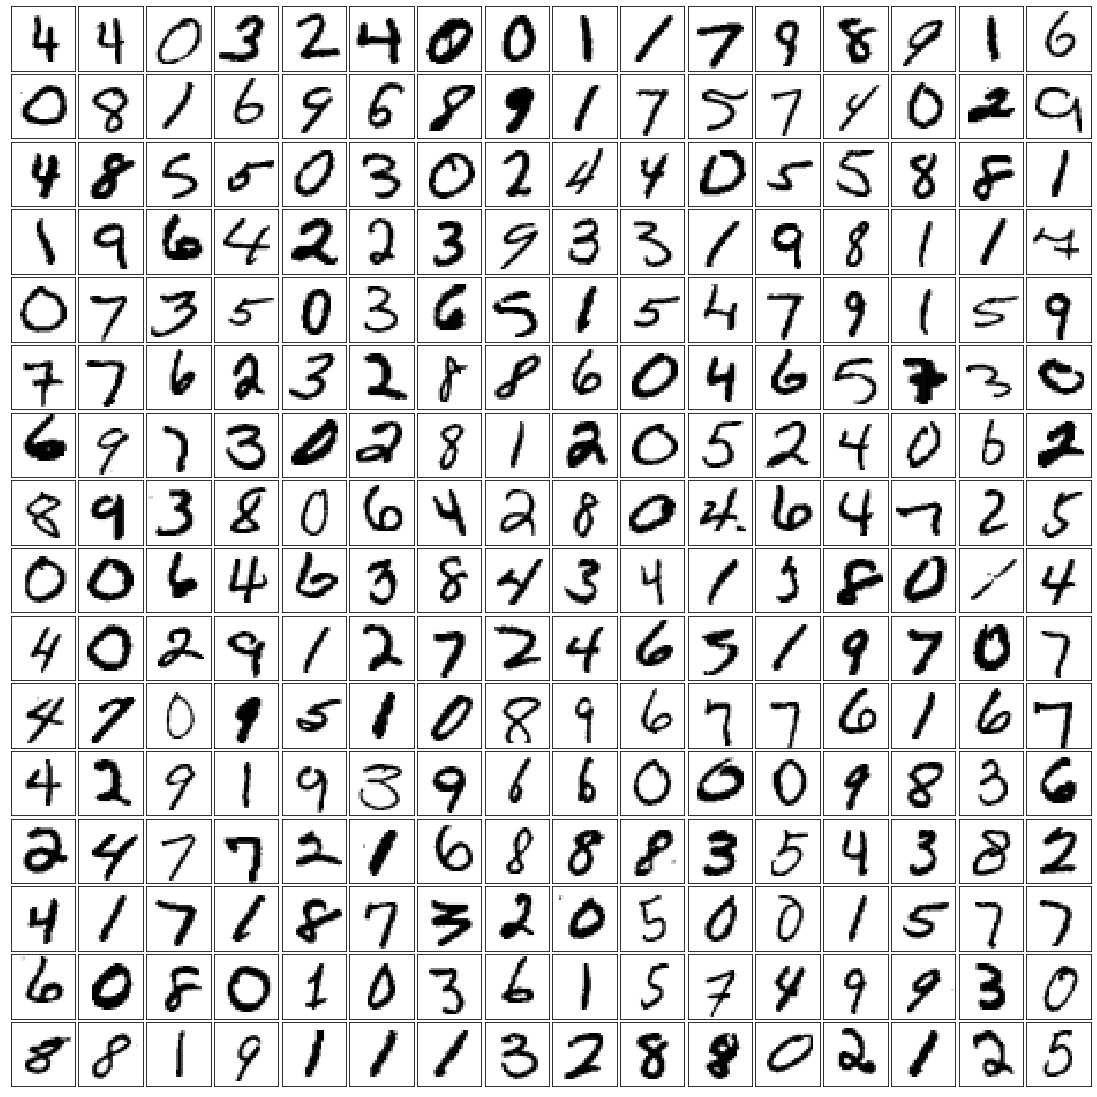

In [4]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for j in range(256):
    i = randint(0, len(x_train) - 1)
    ax = fig.add_subplot(16, 16, j + 1, xticks=[], yticks=[])
    ax.imshow(x_train.reshape(-1, 28, 28)[i], cmap=plt.cm.binary, interpolation='nearest')
ax.axis("on")
fig.savefig('out.png', dpi=fig.dpi, edgecolor="purple")

In [6]:
pca_inicio = time()
pca = PCA(n_components=2)
proj = pca.fit_transform(x_train)
pca_fin = time()

In [7]:
tsvd_inicio = time()
tsvd = TruncatedSVD(n_components=2)
proj_tsvd = tsvd.fit_transform(x_train)
tsvd_fin = time()

In [8]:
d = {"PCA": [round(pca_fin - pca_inicio, 3)], "T-SVD": [round(tsvd_fin - tsvd_inicio, 3)]}
tiempos = pd.DataFrame(data=d, index=["Tiempo en segundos"])
tiempos

,PCA,T-SVD
Tiempo en segundos,1.883,5.914


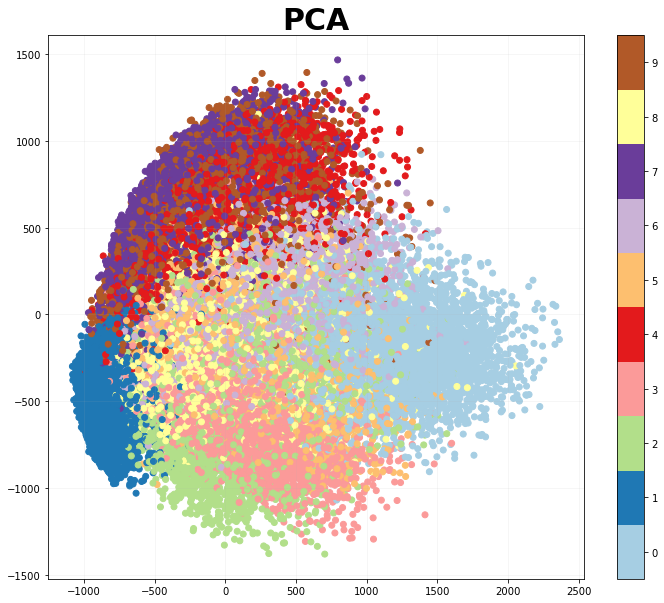

In [23]:
plt.figure(figsize=(12, 10))
pca = PCA(n_components=2)
plt.title("PCA", fontweight="extra bold", fontsize=30)
plt.grid(True, linewidth=1, alpha=0.1)
proj = pca.fit_transform(x_train)
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap="Paired", alpha=1, marker=".")
cmap = plt.get_cmap('Paired', 10)
scatter = plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap=cmap)
cbar = plt.colorbar(scatter)
tick_locs = (np.arange(10) + 0.5)*(10-1)/10
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(np.arange(10))
plt.show()

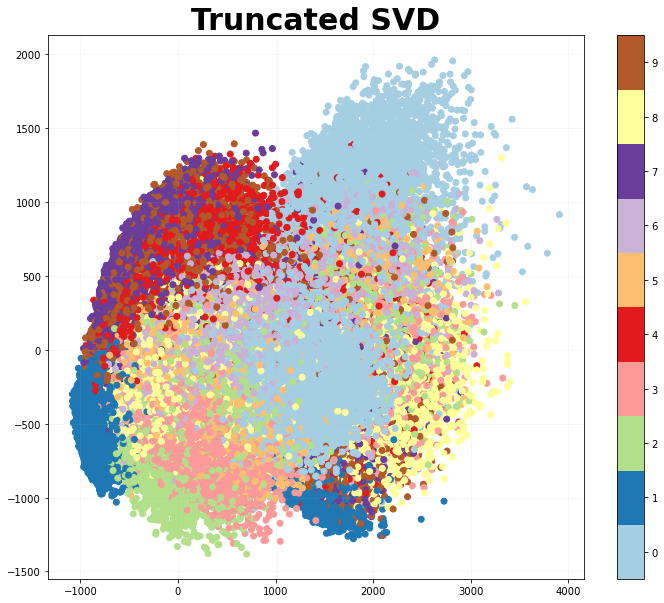

In [24]:
plt.figure(figsize=(12, 10))
plt.scatter(proj_tsvd[:, 0], proj_tsvd[:, 1], c=y_train, cmap="Paired")
plt.title("Truncated SVD", fontweight="extra bold", fontsize=30)
plt.grid(True, linewidth=1, alpha=0.1)
plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap="Paired", alpha=1, marker=".")
cmap = plt.get_cmap('Paired', 10)
scatter = plt.scatter(proj[:, 0], proj[:, 1], c=y_train, cmap=cmap)
cbar = plt.colorbar(scatter)
tick_locs = (np.arange(10) + 0.5)*(10-1)/10
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(np.arange(10))
plt.show()